In [108]:
from scipy import stats as st
from scipy.stats import chisquare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import plotly.figure_factory as ff



In [109]:
survey_raw = pd.read_csv("Raw_survey_data.csv")
survey_raw["dummy"] = [1]*1600
survey_raw = survey_raw.rename(columns = {'q4':'LOIF','q5':'LOTM','q8':'LOIT','q17':'House_Status','q18':'Household_Status','q19':'Grocery_Budget_Strictness','Age_Catagory' : 'Age_Category'},errors="raise")

In [110]:
survey_raw = survey_raw.groupby("Prefecture_code")

In [111]:
eleven_raw = survey_raw.get_group(11)
twelve_raw = survey_raw.get_group(12)
thirteen_raw = survey_raw.get_group(13)
fourteen_raw = survey_raw.get_group(14)

In [112]:
eleven_raw_LOIF = eleven_raw.groupby("LOIF").count()
eleven_raw_LOIF = eleven_raw_LOIF["dummy"]

In [113]:
twelve_raw_LOIF = twelve_raw.groupby("LOIF").count()
twelve_raw_LOIF = twelve_raw_LOIF["dummy"]

In [114]:
thirteen_raw_LOIF = thirteen_raw.groupby("LOIF").count()
thirteen_raw_LOIF = thirteen_raw_LOIF["dummy"]

In [115]:
fourteen_raw_LOIF = fourteen_raw.groupby("LOIF").count()
fourteen_raw_LOIF = fourteen_raw_LOIF["dummy"]

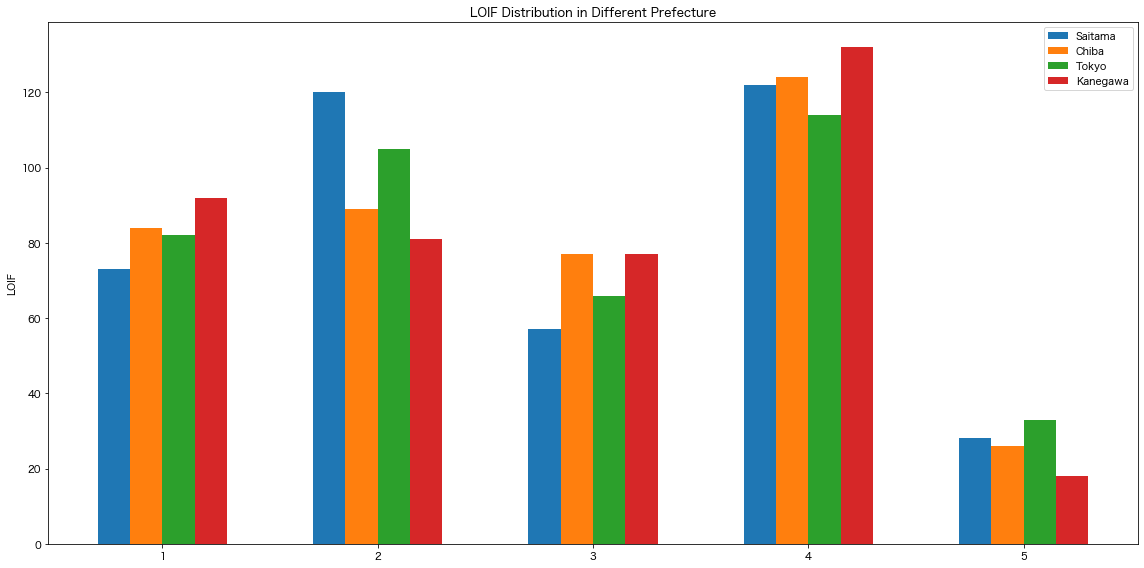

In [116]:
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(fourteen_raw_LOIF)) 
total_width = 0.15

rects1 = ax.bar(x-total_width*2+total_width/2, eleven_raw_LOIF, total_width,label = "Saitama")
rects2 = ax.bar(x-total_width+total_width/2, twelve_raw_LOIF, total_width, label = "Chiba")
rects3 = ax.bar(x+total_width/2, thirteen_raw_LOIF, total_width, label = "Tokyo")
rects4 = ax.bar(x+total_width+total_width/2, fourteen_raw_LOIF, total_width, label = "Kanegawa")
labels = [i for i in range(1,6)]
ax.set_ylabel('LOIF')
ax.set_title('LOIF Distribution in Different Prefecture')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()